In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sn
import time

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [3]:
X,y = mnist.data,mnist.target
X.shape  # 70k images of the size 28*28 px and each image having 784 features(28 * 28) where each pixel is varying between 0 to 255 0: white and 255: black

(70000, 784)

In [4]:
y.shape # 1D array with labels to 70k images

(70000,)

In [5]:
# dividing the dataset into training and testing set
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
print("Model Trained Succesfully")

Model Trained Succesfully


In [7]:
y[0]

'5'

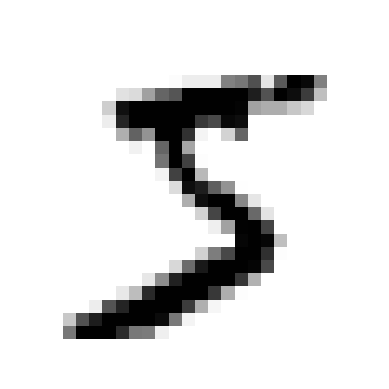

In [8]:
def plot_digit(img_data):
    image = img_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
knn.predict([some_digit]).astype('int8')

array([5], dtype=int8)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.969  , 0.96805, 0.9675 ])

In [13]:
# checking the confusion matrix
from sklearn.model_selection import cross_val_predict
y_trained_pred = cross_val_predict(rf_clf,X_train,y_train,cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_trained_pred)
cm

array([[5884,    3,    3,    0,    1,    4,   18,    1,    5,    4],
       [   3, 6708,    8,    1,    2,    1,    2,   10,    3,    4],
       [  53,   56, 5706,   13,    9,    3,    8,   87,   16,    7],
       [  11,   16,   38, 5898,    1,   68,    3,   34,   39,   23],
       [   8,   59,    1,    0, 5634,    0,   12,    9,    3,  116],
       [  24,   13,    7,   80,    8, 5195,   58,    5,   10,   21],
       [  27,   13,    1,    0,    6,   18, 5850,    0,    3,    0],
       [   5,   60,   14,    3,   22,    2,    0, 6091,    2,   66],
       [  29,   76,   19,   83,   39,   97,   26,   14, 5416,   52],
       [  18,   15,    7,   39,   57,   12,    3,   80,    9, 5709]])

In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_trained_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5923
           1       0.96      0.99      0.97      6742
           2       0.98      0.96      0.97      5958
           3       0.96      0.96      0.96      6131
           4       0.97      0.96      0.97      5842
           5       0.96      0.96      0.96      5421
           6       0.98      0.99      0.98      5918
           7       0.96      0.97      0.97      6265
           8       0.98      0.93      0.95      5851
           9       0.95      0.96      0.96      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



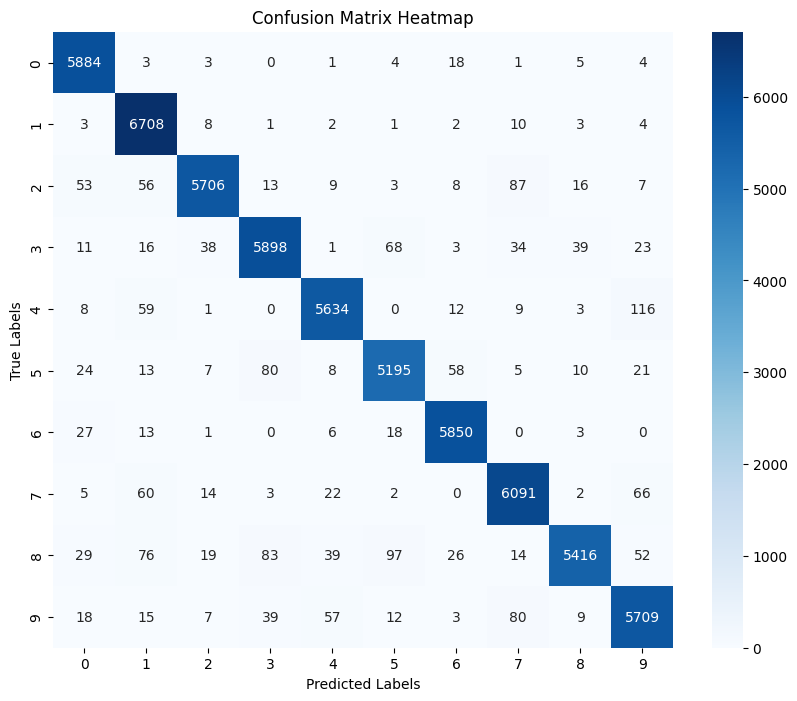

In [16]:
# plotting heatmap for the confusion matrix
plt.figure(figsize=(10, 8))  
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [18]:
# saving the model
import joblib
joblib.dump(knn, 'Digi_reg.pkl')
print("MODEL SAVED SUCCESSFULLY")

MODEL SAVED SUCCESSFULLY
